<a href="https://colab.research.google.com/github/MKolaksazov/Data-Science/blob/main/Colab%20code%20(graphs)/Tukey_test_letters_240806.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drawing a 'BOXPLOT' graph

Includes letters, showing the significant differences between variants, derived by the means of the Tukey's test.

Before everything else, parameters used inside this code should be defined. This is done to make corrections easier and avoid setting them inside the code.

In [605]:
# PARAMETERS
csv_file = '/content/mixed_cultures_ojip_all.csv' #"/content/lupin_PM_0602_ew.csv" #/content/lupina-params-1.csv

stacked = False
sorting = True
abbreviations = False
parameter = 'RC/CSm' # required column
x_label = ''#grass forage species' #'$\it{L.}$ $\it{albus}$ cultivars' # 'Chickpea ($\mathit{Cicer}$ $\it{arietinum}$) cultivars' # 'grass forage species' # 'L. albus cultivars' # 'Sorghum cultivars' # 'grass forage species' #

y_height = 0.7 # height of the graph
y_dist = 0.2 # distance between labels
title_main =  'PI $_{ABS}$ (performance index)'
y_label = '(a.u.)'

'''
title_main = 'CO$_2$ uptake (A$_{n}$)'
y_label = r'$\mu$mol m$^{-2}$s$^{-1}$' # CO$_2$'

title_main = 'Concentration of chlorophyll'
y_label = 'cci'

# $\mu$g m$^{-2}$ chl (cci)

title_main =  'PI $_{ABS}$ (performance index)'
y_label = '(a.u.)'

title_main =  '$\it{\u03C6}\mathsf{_{Ro}}$' \u03C8
y_label = '(a.u.)'

# TAC - water extracts
# mM AAE g${^-1}$ '[mg L${^-1}$] AAE'
'''

#
group_order2 = [
'Lolium perenne','Festuca arundinacea','Festuca pratensis','Festuca rubra','Bromus inermis'
]

group_order = [
                'La s Apr 26','La s May 21','La s May 28','La s Jun 14',
                'La m Apr 26','La m May 21','La m May 28','La m Jun 14',
                'Hv s Apr 26','Hv s May 21','Hv s May 28','Hv s Jun 14',
                'Hv m Apr 26','Hv m May 21','Hv m May 28','Hv m Jun 14',
]

group_order3 = [
                'La s Apr 26','La m Apr 26','Hv s Apr 26','Hv m Apr 26',
                'La s May 21','La m May 21','Hv s May 21','Hv m May 21',
                'La s May 28','La m May 28','Hv s May 28','Hv m May 28',
                'La s Jun 14','La m Jun 14','Hv s Jun 14','Hv m Jun 14',
]

group_order1 = [
' `1',' `4',' `6',' `25', ' `25`15', ' `28`1',' `28`15',' `125`16',' `125`20',' `251`3b',' `251`3p',' `251`8', ' `251`18', ' `254`4', ' `254`11',' `254`17',' `254`18',' `425`12',' `425`18',' `425`25'
]




PARAMETERS - how to represent them as special characters

```'CO$_2$ uptake (A$_{n}$)'```

CO$_2$ uptake (A$_{n}$)

```r'$\mu$mol m$^{-2}$s$^{-1}$' # CO$_2$'```

[$\mu$mol m$^{-2}$s$^{-1}$] CO$_2$

Concentration of chlorophyll

```'$\mu$g m$^{-2}$ chl (cci)'```

$\mu$g m$^{-2}$ chl (cci)

```'PI $_{ABS}$ (performance index)'```

PI $_{ABS}$ (performance index)

```'\u03C6 $_{Ro}$'```
\u03C6 \phi $_{Ro}$
(a.u.)

TAC - water extracts

```'[mM g${^-1}$] AAE'``` [mM g${^-1}$] AAE

####1) importing of the libraries and the **.csv** file

The columns of this table file should containt parameters, whereas the group variants written as indexes of the rows. These indexes will be shown in the first column, named *'groups'*.

the delimiter is usually a semicolon ```;```, but can be a tabulation ```\t```


In [606]:
import pandas as pd
import numpy as np

df = pd.read_csv(csv_file, delimiter=',', decimal='.') # delimiter '\t' or ';'

In [607]:
df = df.dropna()
if (sorting):
  df.sort_values(by="groups", key=lambda column: column.map(lambda e: group_order.index(e)), inplace=True)

In [608]:
# CORRELATION MATRIX

#index = np.array(df.pop('index'))
#df = df.dropna()
#corr = df.corr()
#corr.style.background_gradient(cmap='coolwarm')

1.2) Popping out the labels of the variation groups in a dataframe, called *'names'*.
Transposing the dataframe, so that it can be easily processed by the covariance test analysis and matplotlib. Converting it into numpy array.

In [609]:
# print the resulting DataFrame
print(df)
named = np.array(df.pop('groups'))
#index = np.array(df.pop('index'))
transposed_df = df.T
print(transposed_df.loc['Phi_Po'])

         groups                 time  Bckg     Fo     Fj     Fi     Fm     Fv  \
38  La s Apr 26  12:45:02  26.4.2024   390   6957  19474  27081  39501  32544   
37  La s Apr 26  12:44:37  26.4.2024   390   6827  19896  28739  41484  34657   
36  La s Apr 26  12:44:18  26.4.2024   390   6762  20059  30365  44475  37713   
0   La s May 21  11:42:47  21.5.2024   390   9103  28479  41094  54846  45743   
1   La s May 21  11:43:23  21.5.2024   390   8030  22140  29747  44572  36542   
2   La s May 21  11:43:43  21.5.2024   390   7900  23505  34071  49644  41744   
22  La s May 28  14:12:41  28.5.2024   390   6827  19084  28739  42264  35437   
21  La s May 28  14:12:21  28.5.2024   390   7542  21099  33323  48311  40769   
23  La s May 28  14:13:03  28.5.2024   390   6924  18824  28349  42492  35568   
26  La s Jun 14  10:21:38  14.6.2024   390   7640  19149  31698  48701  41061   
25  La s Jun 14  10:20:36  14.6.2024   390   7575  19376  33421  50197  42622   
24  La s Jun 14  10:20:06  1

1.3) An optional step required to abbreviate the longer latin names of the crops, so that they can fit in the graph.

In [610]:
#ABBREVIATION

if abbreviations:
  try:
      print('before: ', named)
      import re
      # Abbreviating the latin names from 'Aaaaa aaaaaa (L.)' to 'A. aaaaaa (L.)'
      for i in range(len(named)):
          c = named[i][0]
          #named[i] = re.sub(r'[A-Z]([a-z]+ )', c + '. ', named[i])
          named[i] = "".join(re.findall(r'\b\w', named[i]))

      print('after: ', named)
  except:
      print(named.astype(int))
      named=named.astype(int)
      print('latin names not present')


1.4) Popping out the column with the desired parameter by writing the name in the 'pop' function, as well as transposing it.

This short code is used to perform calculations, based on the compound parameters, we would like to obtain from the original data. For example we would want to find out the values of the parameter 'RC/CS$_o$'. Thus, we can use the already present in the raw data 'F$_o$', 'ABS/RC' and divide them to obtain the needed parameter.

In [611]:
from logging import exception
#DERIVED PARAMETERS
def derivations(params, y_height, y_dist, title_main):
    Fi_params = df.pop('Fi')
    Fo_params = df.pop('Fo')
    Fm_params = df.pop('Fm')
    ABS_params = df.pop('ABS/RC')
    #index = np.array(df.pop('index'))

    if params == 'Phi_Ro':
        y_height = 0.4 # height of the graph
        y_dist = 0.1 # distance between labels
        title_main = '\u03C6$_{Ro}$ '
        derived_params = (Fm_params - Fi_params)/Fm_params

    elif params == 'Phi_Eo':
        y_height = 0.7 # height of the graph
        y_dist = 0.1 # distance between labels
        title_main = '\u03C6$_{Eo}$ '
        derived_params = transposed_df.loc[params]

    elif params == 'Phi_Po':
        y_height = 1 # height of the graph
        y_dist = 0.2 # distance between labels
        title_main = '\u03C6$_{Po}$ '
        derived_params = transposed_df.loc[params]

    elif params == 'Phi_Do':
        y_height = 0.3 # height of the graph
        y_dist = 0.1 # distance between labels
        title_main = '\u03C6$_{Do}$ '
        derived_params = transposed_df.loc[params]

    elif params == 'Pi_Abs':
        y_height = 10 # height of the graph
        y_dist = 2 # distance between labels
        title_main = 'PI $_{ABS}$ '
        derived_params = transposed_df.loc[params]

    elif params == 'gamma_chl':
        y_height = 0.5 # height of the graph
        y_dist = 0.1 # distance between labels
        title_main = '\u03B3$_{chl}$'
        #transp_p = pd.to_numeric(compound_params.T)
        derived_params = 1/(ABS_params + 1)

    elif params == 'RC/CSo':
        y_height = 8000 # height of the graph
        y_dist = 2000 # distance between labels
        title_main = 'RC/CS$_O$'
        derived_params = Fo_params/ABS_params

    elif params == 'RC/CSm':
        y_height = 45000 # height of the graph
        y_dist = 5000 # distance between labels
        title_main = 'RC/CS$_M$'
        derived_params = Fm_params/ABS_params

    elif params == 'Fo':
        y_height = 17000 # height of the graph
        y_dist = 2000 # distance between labels
        title_main = 'ABS/CS$_O$ (F$_{O}$)'
        derived_params = Fo_params

    elif params == 'Fm':
        y_height = 90000 # height of the graph
        y_dist = 20000 # distance between labels
        title_main = 'ABS/CS$_M$ (F$_{M}$)'
        derived_params = Fm_params

    elif params == 'ABS/RC':
        y_height = 3 # height of the graph
        y_dist = 1 # distance between labels
        title_main = 'ABS/RC'
        derived_params = ABS_params

    else:
        params = df.pop(parameter) #required param
        derived_params = pd.to_numeric(params.T)

    data = pd.DataFrame({
        #'Index': index,
        'Variant': named,
        'Value': derived_params
    })

    return data, y_height, y_dist, title_main

In [612]:
# NORMALISING the very large values of the parameters
'''
compound_params = df.pop('Fm')
transp_p = pd.to_numeric(compound_params.T)

max_p1 = max(transp_df)
max_p2 = max(transp_p)
min_p1 = min(transp_df)
min_p2 = min(transp_p)

df_norm = (transp_df - min_p1) / (max_p1 - min_p1)
p_norm = (transp_p - min_p2) / (max_p2 - min_p2)
p_norm
'''

"\ncompound_params = df.pop('Fm')\ntransp_p = pd.to_numeric(compound_params.T)\n\nmax_p1 = max(transp_df)\nmax_p2 = max(transp_p)\nmin_p1 = min(transp_df)\nmin_p2 = min(transp_p)\n\ndf_norm = (transp_df - min_p1) / (max_p1 - min_p1)\np_norm = (transp_p - min_p2) / (max_p2 - min_p2)\np_norm\n"

1.5) Converting the dataframe into a 1D numpy array

In [613]:
'''
from matplotlib.patches import namedtuple
#convert dataframe to matrix
conv_arr= transp_df.values # df - one param ; cp - comp param

#converting into 1D array
one_D_array = conv_arr.ravel()

print(one_D_array, named)
'''

'\nfrom matplotlib.patches import namedtuple\n#convert dataframe to matrix\nconv_arr= transp_df.values # df - one param ; cp - comp param\n\n#converting into 1D array\none_D_array = conv_arr.ravel()\n\nprint(one_D_array, named)\n'

####2) arranging the data by samples column-wise and taking out the names of the variants in a different array

Converting the 2-D pandas dataframe into a 1-D numpy array. ```numpy.append(array1, array2) ``` can be used to append two arrays.

Probably ```pandas.dataframe.pop()``` can be used as well.

In [614]:
try:
    data, y_height, y_dist, title_main = derivations(parameter, y_height, y_dist, title_main)
except Exception as e:
    print(e)
    params = df.pop(parameter) #required param
    derived_params = pd.to_numeric(params.T)
    print('no params')
    data = pd.DataFrame({
        'Variant': named,
        'Value': derived_params
    })

3) performing the co-variance test
(the following is a variant, showing the t-test)
(currently not shown)

4) This is a very simple code, showing a Tukey's test analysis and printing the summarized data

# writing out the combinations of the groups:
```
result.pvalues[result.pvalues < 0.05]
result.reject
result_list = result.groupsunique.tolist()
all_groups = []
// writing out the all possible combinations:
while result_list:
  for n in result_list:
    if result_list[0] != n:
      print(result_list[0], n)
      all_groups.append(str(result_list[0] + n))
  result_list.pop(0)

all_groups
// finding out the rejected groups (p < 0.05):
t = list(result.reject) // all groups (true or false)

from itertools import compress
ind = list(compress(range(len(t)), t)) // indeces of groups if reject == True

for i in ind:
  print(all_groups[i])

// other variant:
// find all indeces of p-values within range
print(np.where(result.pvalues >= 0.05)[0])
print(np.where(np.logical_and(result.pvalues < 0.05, result.pvalues >= 0.01))[0])
print(np.where(np.logical_and(result.pvalues < 0.01, result.pvalues >= 0.001))[0])
print(np.where(result.pvalues < 0.001)[0])

ind = np.where(result.pvalues < 0.001)[0]

for i in ind:
  print(all_groups[i])
```

In [615]:
#data
data
type(data['Variant'][1])

str

In [616]:
import statsmodels.stats.multicomp as mc

value = 'Value' #'8 TAC' #'Value'
variant = 'Variant' #'8 groups' #'Variant'
sorting_labels = variant
if stacked: data = df

# Perform one-way ANOVA to check for significant differences
model = mc.MultiComparison(data[value].astype('float'), data[variant])
#model = mc.MultiComparison(data['6 TAC'], data['6 groups'])
result = model.tukeyhsd()
print(result.groupsunique)
#print(np.sum(result.reject), len(result.reject))
#result.groups[result.pvalues < 0.05]
#result.groups[result.reject==True]
# The null hypothesis H0 for the test states that the means of the tested groups are equal.
result.summary()

['Hv m Apr 26' 'Hv m Jun 14' 'Hv m May 21' 'Hv m May 28' 'Hv s Apr 26'
 'Hv s Jun 14' 'Hv s May 21' 'Hv s May 28' 'La m Apr 26' 'La m Jun 14'
 'La m May 21' 'La m May 28' 'La s Apr 26' 'La s Jun 14' 'La s May 21'
 'La s May 28']


group1,group2,meandiff,p-adj,lower,upper,reject
Hv m Apr 26,Hv m Jun 14,-2211.8642,0.9989,-9746.2085,5322.4801,False
Hv m Apr 26,Hv m May 21,920.1171,1.0,-6614.2272,8454.4613,False
Hv m Apr 26,Hv m May 28,-471.678,1.0,-8006.0223,7062.6662,False
Hv m Apr 26,Hv s Apr 26,-543.3933,1.0,-8077.7375,6990.951,False
Hv m Apr 26,Hv s Jun 14,-1169.9236,1.0,-8704.2679,6364.4206,False
Hv m Apr 26,Hv s May 21,-10002.7293,0.0022,-17537.0736,-2468.385,True
Hv m Apr 26,Hv s May 28,-601.3039,1.0,-8135.6482,6933.0403,False
Hv m Apr 26,La m Apr 26,-5116.466,0.4836,-12650.8103,2417.8783,False
Hv m Apr 26,La m Jun 14,3128.5962,0.9682,-4405.7481,10662.9404,False
Hv m Apr 26,La m May 21,-666.9,1.0,-8201.2443,6867.4443,False


In [617]:
result_list = result.groupsunique.tolist()
all_groups = []

while result_list:
  for n in result_list:
    if result_list[0] != n:
      all_groups.append(str(result_list[0] + n))
  result_list.pop(0)
''''''
print(np.where(result.pvalues >= 0.05)[0])
print(np.where(np.logical_and(result.pvalues < 0.05, result.pvalues >= 0.01))[0])
print(np.where(np.logical_and(result.pvalues < 0.01, result.pvalues >= 0.001))[0])
print(np.where(result.pvalues < 0.001)[0])

ind = np.where(result.pvalues < 0.001)[0]

for i in ind:
  print(all_groups[i])

[  0   1   2   3   4   6   7   8   9  10  11  12  13  14  15  16  17  18
  20  21  22  23  24  25  26  27  28  29  30  31  33  34  35  36  37  38
  39  40  41  42  43  45  46  47  48  49  50  51  52  53  54  56  57  58
  59  60  61  62  63  64  66  67  68  69  70  71  72  73  74  76  81  84
  85  86  87  88  89  90  91  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119]
[19 65 79 83 92]
[ 5 44 55 75 78 82]
[32 77 80]
Hv m May 21Hv s May 21
Hv s May 21La m Jun 14
Hv s May 21La s Apr 26


In [618]:
import scipy.stats as stats
import matplotlib.pyplot as plt

y_ticks = np.round(np.arange(0, y_height, y_dist), 1)

In [619]:
# define columns for data and then grouping
col_to_group=sorting_labels
col_for_data=value

#Now take teh data and regroup for anova
samples = [cols[1] for cols in data.groupby(col_to_group)[col_for_data]]
#I am not sure how this works but it makes an numpy array for each group
f_val, p_val = stats.f_oneway(*samples)
# I am not sure what this star does but this passes all the numpy arrays correctly

# this if statement can be uncommmented if you don't won't to go furhter with out p<0.05
#if p_val<0.05:    #If the p value is less than 0.05 it then does the tukey
mod = mc.MultiComparison(data[col_for_data].astype('float'), data[col_to_group])
thsd=mod.tukeyhsd()

#this is a function to do Piepho method.
#AN Alogrithm for a letter based representation of al-pairwise comparisons.
tot=len(thsd.groupsunique)
print(thsd.groupsunique)
#make an empty dataframe that is a square matrix of size of the groups. #set first column to 1
df_ltr=pd.DataFrame(np.nan, index=np.arange(tot),columns=np.arange(tot))
#df_ltr.iloc[:,0]=1
df_ltr[df_ltr.columns[0]] = 1
#df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)

count=0
df_nms = pd.DataFrame('', index=np.arange(tot), columns=['names'])

# I make a dummy dataframe to put axis labels into.  sd stands for signifcant difference

for i in np.arange(tot):   #I loop through and make all pairwise comparisons.
    for j in np.arange(i+1,tot):
        #print('i=',i,'j=',j,thsd.reject[count])
        if thsd.reject[count]==True:
            for cn in np.arange(tot):
                if df_ltr.iloc[i,cn]==1 and df_ltr.iloc[j,cn]==1:
                  #If the column contains both i and j shift and duplicat
                    df_ltr=pd.concat([df_ltr.iloc[:,:cn+1],df_ltr.iloc[:,cn+1:].T.shift().T],axis=1)
                    df_ltr[df_ltr.columns[cn+1]]=df_ltr[df_ltr.columns[cn]]
                    df_ltr.iloc[i,cn]=0
                    df_ltr.iloc[j,cn+1]=0
                #Now we need to check all columns for abosortpion.
                for cleft in np.arange(len(df_ltr.columns)-1):
                    for cright in np.arange(cleft+1,len(df_ltr.columns)):
                        if (df_ltr[df_ltr.columns[cleft]].isna()).all()==False and (df_ltr[df_ltr.columns[cright]].isna()).all()==False:
                            if (df_ltr[df_ltr.columns[cleft]]>=df_ltr[df_ltr.columns[cright]]).all()==True:
                                df_ltr[df_ltr.columns[cright]]=0
                                df_ltr=pd.concat([df_ltr[df_ltr.columns[:cright]],df_ltr[df_ltr.columns[cright:]].T.shift(-1).T],axis=1)
                            if (df_ltr[df_ltr.columns[cleft]]<=df_ltr[df_ltr.columns[cright]]).all()==True:
                                df_ltr[df_ltr.columns[cleft]]=0
                                df_ltr=pd.concat([df_ltr[df_ltr.columns[:cleft]],df_ltr[df_ltr.columns[cleft:]].T.shift(-1).T],axis=1)

        count+=1

#I sort so that the first column becomes A
df_ltr=df_ltr.sort_values(by=list(df_ltr.columns),axis=1,ascending=False)

# I assign letters to each column
for cn in np.arange(len(df_ltr.columns)):
    df_ltr[df_ltr.columns[cn]]=df_ltr[df_ltr.columns[cn]].replace(1,chr(97+cn))
    df_ltr[df_ltr.columns[cn]]=df_ltr[df_ltr.columns[cn]].replace(0,'')
    df_ltr[df_ltr.columns[cn]]=df_ltr[df_ltr.columns[cn]].replace(np.nan,'')
    #print(df_ltr.columns[cn])

#I put all the letters into one string
df_ltr=df_ltr.astype(str)
df_ltr.sum(axis=1)


['Hv m Apr 26' 'Hv m Jun 14' 'Hv m May 21' 'Hv m May 28' 'Hv s Apr 26'
 'Hv s Jun 14' 'Hv s May 21' 'Hv s May 28' 'La m Apr 26' 'La m Jun 14'
 'La m May 21' 'La m May 28' 'La s Apr 26' 'La s Jun 14' 'La s May 21'
 'La s May 28']


0      ab
1      ab
2      ab
3      ab
4      ab
5      ab
6       c
7      ab
8      ac
9       b
10     ab
11     ab
12     ab
13    abc
14     ab
15     ab
dtype: object

In [620]:
new_df_ltr = np.array(df_ltr.sum(axis=1))
#new_v = new_df_ltr[0]
#new_df_ltr[0] = new_df_ltr[4]
#new_df_ltr[4] = new_v

new_ltr = []

# ORDERING OF THE LETTERS!!!
for i in range(len(group_order)):
  ltr = [group_order[i], thsd.groupsunique.tolist().index(group_order[i]),
  new_df_ltr[thsd.groupsunique.tolist().index(group_order[i])]]
  print(ltr)
  new_ltr.append(ltr[2])

print(np.array(df_ltr.sum(axis=1)), new_ltr)

['La s Apr 26', 12, 'ab']
['La s May 21', 14, 'ab']
['La s May 28', 15, 'ab']
['La s Jun 14', 13, 'abc']
['La m Apr 26', 8, 'ac']
['La m May 21', 10, 'ab']
['La m May 28', 11, 'ab']
['La m Jun 14', 9, 'b']
['Hv s Apr 26', 4, 'ab']
['Hv s May 21', 6, 'c']
['Hv s May 28', 7, 'ab']
['Hv s Jun 14', 5, 'ab']
['Hv m Apr 26', 0, 'ab']
['Hv m May 21', 2, 'ab']
['Hv m May 28', 3, 'ab']
['Hv m Jun 14', 1, 'ab']
['ab' 'ab' 'ab' 'ab' 'ab' 'ab' 'c' 'ab' 'ac' 'b' 'ab' 'ab' 'ab' 'abc' 'ab'
 'ab'] ['ab', 'ab', 'ab', 'abc', 'ac', 'ab', 'ab', 'b', 'ab', 'c', 'ab', 'ab', 'ab', 'ab', 'ab', 'ab']


In [621]:
def draw_letters(y, follow_bars=False, bplt=0, fsize=10):

  for i, grp in enumerate(pd.unique(data[variant].values)):   #I loop through the groups to make the scatters and figure out the axis labels.
      if follow_bars:
        y_pos = data[data[variant] == grp][value].max() + y * 0.05
      else:
        y_pos = y * 0.98 #y_pos = ax.get_ylim()[1]*1
      ax.text(i+bplt, y_pos, new_ltr[i],
              rotation=90, fontsize=fsize, verticalalignment='top', horizontalalignment='center')

In [622]:
# Variant 1
def label_diff(i, j, text, X, Y, bplt=0, y_text=0.1, ytcoef=0.3, yarrows=0.1, left_right=True, rnd=4):
    text = np.round(text, rnd)
    lr = i if left_right else j
    props = {'connectionstyle':'bar, angle=180, fraction=0.1', 'arrowstyle':'-',\
                 'shrinkA':y_height*0.1, 'shrinkB':y_height*0.1, 'linewidth':1}
    stars = ' ***' if text < 0.001 else ' **' if text < 0.01 else ' *' if text < 0.05 else ' ns'
    ax.annotate(stars + ' (p = ' + str(text) + ')',
                    xy = (X[lr] + bplt, Y[lr] + y_text * ytcoef), zorder=10)
    ax.annotate('', xy = (X[i] + bplt, Y[i] + y_height * yarrows),
                xytext = (X[j] + bplt, Y[j] + y_height * yarrows), arrowprops=props)

In [623]:
'''
#data.set_index('Variant').value_counts().loc[group_order].plot.bar()
import pandas as pd
from matplotlib.ticker import MaxNLocator
fig, ax = plt.subplots()

my_df = data

sorter = dict([(k, v) for (v,k) in enumerate(group_order)])

(my_df.assign(sorter=my_df['Variant'].map(sorter))
      .sort_values('sorter')['Variant'].loc[group_order].plot.bar(ax=ax))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
'''

"\n#data.set_index('Variant').value_counts().loc[group_order].plot.bar()\nimport pandas as pd\nfrom matplotlib.ticker import MaxNLocator\nfig, ax = plt.subplots()\n\nmy_df = data\n\nsorter = dict([(k, v) for (v,k) in enumerate(group_order)])\n\n(my_df.assign(sorter=my_df['Variant'].map(sorter))\n      .sort_values('sorter')['Variant'].loc[group_order].plot.bar(ax=ax))\nax.yaxis.set_major_locator(MaxNLocator(integer=True))\n"

In [624]:
stat_result = data.groupby([sorting_labels], as_index=False, sort=False).agg({value:['mean','std']})

menMeans = stat_result[value]['mean']
menStd = stat_result[value]['std']

labels = pd.unique(data[sorting_labels]).astype(str)
#labels = pd.unique(data[variant]).astype(str)

stat_result_df = pd.DataFrame({
    'mean': menMeans,
    'std': menStd
})

ind  = np.arange(len(stat_result_df['std']))    # the x locations for the groups
width= 0.7

In [625]:
stat_result_df

,mean,std
0,32388.412276,4139.860792
1,30749.405446,4373.724326
2,29435.314978,1994.515706
3,28442.677897,941.323235
4,25963.379661,3697.793502
5,30412.945683,2842.049302
6,29539.647882,2071.379014
7,34208.441846,3068.644559
8,30536.452427,2115.964470
9,21077.116385,2052.723483


In [626]:
#ALTERNATIVE GRAPH
'''

d = data.set_index('Variant').loc[group_order]
fig,ax=plt.subplots()

d.boxplot(column=col_for_data, by=col_to_group, ax=ax, fontsize=14,
             medianprops=dict(color='red'),
             boxprops=dict(color='black'),
             whiskerprops=dict(color='black')
             )


draw_letters(y_height, True, 1)

plt.ylim(ymax=y_height)
ax.set_yticks(y_ticks)

ax.set_xticklabels(group_order, fontsize=10
                   , style='italic', rotation=90)

ax.set(title=title_main, ylabel=y_label, xlabel=x_label)
fig.suptitle('')

plt.grid(False)

'''

"\n\nd = data.set_index('Variant').loc[group_order]\nfig,ax=plt.subplots()\n\nd.boxplot(column=col_for_data, by=col_to_group, ax=ax, fontsize=14,\n             medianprops=dict(color='red'),\n             boxprops=dict(color='black'),\n             whiskerprops=dict(color='black')\n             )\n\n\ndraw_letters(y_height, True, 1)\n\nplt.ylim(ymax=y_height)\nax.set_yticks(y_ticks)\n\nax.set_xticklabels(group_order, fontsize=10\n                   , style='italic', rotation=90)\n\nax.set(title=title_main, ylabel=y_label, xlabel=x_label)\nfig.suptitle('')\n\nplt.grid(False)\n\n"

In [627]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

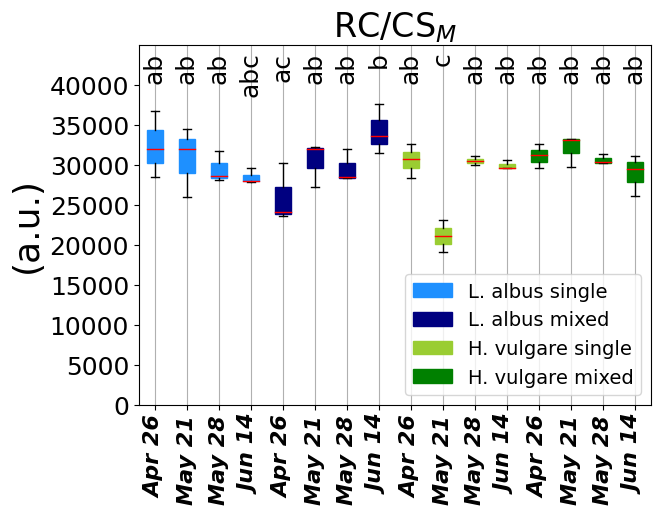

In [628]:
#Now to plot like R with a violing plot
fig,ax=plt.subplots()
#,boxprops=dict(linewidth=2.0),whiskerprops=dict(linewidth=2.0))  #This makes the boxplot

#label_diff(0,2,result.pvalues[1],ind,menMeans, bplt=1, y_text=55\
#           , ytcoef=0.3, yarrows=0.20, left_right=False)
#label_diff(1,3,result.pvalues[7],ind,menMeans, bplt=1, y_text=40\
#           , ytcoef=0.3, yarrows=0.15, left_right=False)

# For sorting !
labels = pd.unique(data[variant]).astype(str)
# create categorical data type and set categorical column as new data type
dtype = pd.CategoricalDtype(labels, ordered=False)
data[sorting_labels] = data[sorting_labels].astype(dtype)
labels = [i[5:] for i in labels]

bp_dict = data.boxplot(column=col_for_data, by=sorting_labels, ax=ax, fontsize=18, patch_artist = True,
             medianprops=dict(color='red'),
             boxprops=dict(color='black'),
             whiskerprops=dict(color='black')
             )

draw_letters(y_height, False, 1, fsize=18)

fill_colors = ['green', 'yellowgreen', 'navy', 'dodgerblue']
colors = []
children = []

for a in range(4):
  repeated = np.tile(np.concatenate([np.repeat(i, j) for i, j
         in zip([fill_colors[a], 'black', 'red', 'black'], [1, 4, 1, 1])]), 4)
  colors = np.append(repeated, colors)

# fill with colors
nn = 0
for patch, color in zip(bp_dict.get_children(), colors):
    patch.set(color = color)

children = [bp_dict.get_children()[0], bp_dict.get_children()[28],
            bp_dict.get_children()[56], bp_dict.get_children()[84]]

plt.ylim(ymax=y_height)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, rotation=0)
ax.set_xticklabels(labels, fontsize=16, style='italic', weight='bold', rotation=90)
ax.set(title='', ylabel=y_label, xlabel=x_label)
ax.set_title(title_main, fontsize=24, rotation=0)
ax.set_ylabel(y_label, fontsize=26)
''''''
ax.legend(handles=children, labels=['L. albus single', 'L. albus mixed',
                                    'H. vulgare single', 'H. vulgare mixed'],
          loc='lower right', fontsize=14)

#wrap_labels(ax, 11)
ax.yaxis.grid(False)
#plt.grid(False)
#ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
fig.suptitle('')
fig.savefig('anovatest.jpg',dpi=600,bbox_inches='tight')

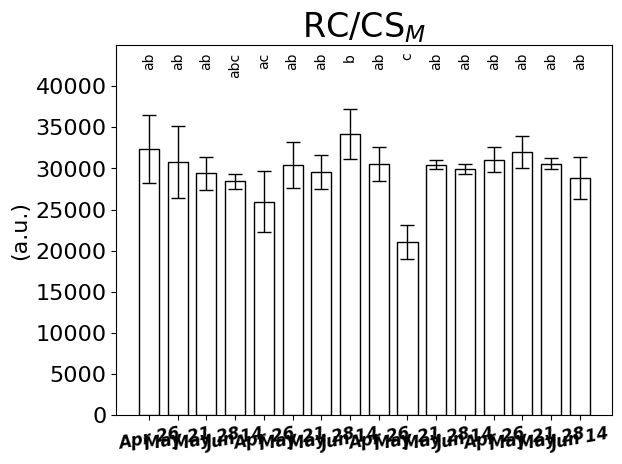

In [629]:
# Pull the formatting out here
bar_kwargs = {'width':width,'color':'white','linewidth':1,'zorder':5,'edgecolor':'black'}
err_kwargs = {'linewidth':1,'ecolor':'black','capsize':5, 'capthick':1}
#'zorder':0, - only up err bars
#for matplotlib >= v1.4 use 'fmt':'none' instead

fig, ax = plt.subplots()

ax.p1 = plt.bar(ind, menMeans, yerr=menStd, error_kw=err_kwargs, **bar_kwargs)
'''
plt.bar(named, data, color='r')
plt.bar(named, w-data, bottom=transposed_df['e'], color='b')
#ax.errs = plt.errorbar(ind, menMeans, yerr=menStd, **err_kwargs)
'''
#label_diff(4,5,np.round(result.pvalues[0], 4),ind,menMeans)
'''
label_diff(0,2,np.round(result.pvalues[1], 4),ind,menMeans)
label_diff(1,3,np.round(result.pvalues[7], 4),ind,menMeans)

y_text=0.6
left_right=True
label_diff(0,1,np.round(result.pvalues[0], 4),ind,menMeans+0.6, y_text=6, left_right=left_right)
label_diff(1,2,np.round(result.pvalues[4], 4),ind,menMeans+0.9, y_text=3.7, left_right=left_right)
label_diff(2,3,np.round(result.pvalues[7], 4),ind,menMeans+0.2, y_text=3, left_right=left_right)
'''
draw_letters(y_height)

ax.set(title=title_main, ylabel=y_label, xlabel=x_label)
plt.xticks(ind, labels, color='k')
ax.set_xticklabels(labels, fontsize=12
                   , style='italic', weight='bold', rotation=10)
plt.ylim(ymax=y_height)
ax.set_yticks(y_ticks)
ax.set_ylabel(y_label, fontsize=16)
ax.set_yticklabels(y_ticks, fontsize=16)
ax.set_title(title_main, fontsize=24)
#wrap_labels(ax, 11)
fig.suptitle('')
plt.show()
#fig.savefig('anovatest.jpg',dpi=300,bbox_inches='tight')

In [630]:
# Variant 2
'''
def label_diff(i,j,y_text,X,Y):
    y = 1.15*max(Y[i], Y[j])
    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':10,'shrinkB':10,'linewidth':1}
    ax.annotate(' ns (p=' + str(y_text) + ')', xy=(X[i],y + y_height*0.07), zorder=10)
    ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)
'''

"\ndef label_diff(i,j,y_text,X,Y):\n    y = 1.15*max(Y[i], Y[j])\n    props = {'connectionstyle':'bar','arrowstyle':'-',                 'shrinkA':10,'shrinkB':10,'linewidth':1}\n    ax.annotate(' ns (p=' + str(y_text) + ')', xy=(X[i],y + y_height*0.07), zorder=10)\n    ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)\n"